In [1]:
from modsim import *

%matplotlib inline

In [2]:
def make_system(beta, gamma, total, infected):
    init = State(S=(total - infected), I=infected, R=0)
    init /= sum(init)
    
    
    
    t0 = 0
    t_end = 100

    return System(init=init, t0=t0, pop0=total, t_end=t_end,
                  beta=beta, gamma=gamma)

In [3]:
def update1(state, system):
    s, i, r = state

    infected = system.beta * i * s    
    recovered = system.gamma * i
    
    s -= infected
    i += infected - recovered
    r += recovered
    
    return State(S=s, I=i, R=r)

In [4]:
def run_SIR_simulation(system, update_func):
    S = TimeSeries()
    I = TimeSeries()
    R = TimeSeries()
    S_pop = TimeSeries()
    I_pop = TimeSeries()
    R_pop = TimeSeries()

    state = system.init
    #init to winit
    t0 = system.t0
    S[t0], I[t0], R[t0] = state
    
    for t in linrange(system.t0, system.t_end):
        state = update_func(state, system)
        S[t+1], I[t+1], R[t+1] = state
    
    S_pop = S * system.pop0
    I_pop = I * system.pop0
    R_pop = R * system.pop0
    system.S = S_pop
    system.I = I_pop
    system.R = R_pop

In [5]:
def plot_results(S, I, R):
    plot(S, '--', color='blue', label='Susceptible')
    plot(I, '-', color='red', label='Infected')
    plot(R, ':', color='green', label='Recovered')
    decorate(xlabel='Time (days)',
             ylabel='Population')

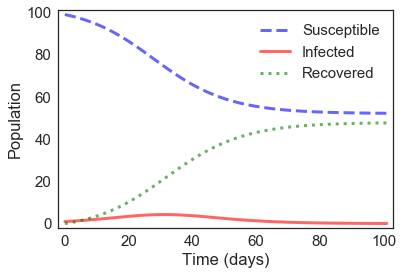

In [6]:
tc = 3      # time between contacts in days 
tr = 4    # recovery time in days

beta = 1 / tc      # contact rate in per day
gamma = 1 / tr     # recovery rate in per day

sir = make_system(beta, gamma, 100, 1)
run_SIR_simulation(sir, update1)
plot_results(sir.S, sir.I, sir.R)

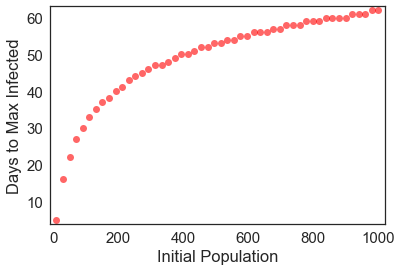

In [9]:
# Create data(frame)
data = pd.DataFrame()
for pop in linspace(10, 1000, 50):
    sir = make_system(beta, gamma, pop, 1)
    run_SIR_simulation(sir, update1)
    data[pop] = sir.I
    
# Find maxes
# for max in enumerate(data.max()):
#     simulation = data[data.columns[max[0]]]
#     print(type(simulation))

plot(data.idxmax(), 'ro')
label_axes(xlabel='Initial Population', ylabel='Days to Max Infected')
    

In [130]:
def pop0_sweep():
    pop_array = linspace(10, 1000, 100)
    time = TimeSeries()
    for pop in pop_array:
        sir = make_system(beta, gamma, pop, 1)
        run_SIR_simulation(sir, update1)
        i = max(sir.I)
               
        

In [133]:
data.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
             92,  93,  94,  95,  96,  97,  98,  99, 100, 101],
           dtype='int64', length=102)